# Set up your notebook

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
# set up plot configurations (if required)
%matplotlib inline

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, auc, confusion_matrix, recall_score, precision_score


In [2]:
titanic = pd.read_csv("../assets/titanic.csv")

# Executive Summary

- Come back to this after your analysis has been completed.

# Problem Statement

## What are you trying to find out?

- Write a well-formed problem statement, with reference to the SMART guideline. Remember that not all of the letters may apply in all cases, it is just a guideline you can follow.

Ans : I am trying to find out the probability of survival of each passenger depending on factors such as age (or age groups), gender, class of passengers, etc. 

## What is your dataset about?

- Describe the dataset in words (you could write a short paragraph, describe the columns, create a data dictionary, etc. but do not include descriptive statistics here)

I have a dataset made up of 12 columns, and a maximum of 891 rows.  Not all of the columns (Age, Cabin, Embarked) are filled; they contain a number of blank fields.  The outcome variable (Survived) is of binary nature - 0 indicates did not survive (or NO Survival) and 1 indicates survived (or YES Survival).  Other variables in this dataset are:

    PassengerID   A unique number for each passenger

    pclass          Passenger Class
                    (1 = 1st; 2 = 2nd; 3 = 3rd)
                
    name            Name - Last name, First Name + Honorifics/GenderTitles

    sex             Sex

    age             Age

    sibsp           Number of Siblings/Spouses Aboard

    parch           Number of Parents/Children Aboard

    ticket          Ticket Number

    fare            Passenger Fare

    cabin           Cabin

    embarked        Port of Embarkation - C, Q, S


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Risks and Assumptions

- There can be many reasons why someone survived the crash and they may have no relations to the attributes of each passenger, such as their age, gender, cabin class, etc.  
- It could be due to the fact that there were not enough safety boats, or safety vests - data of which are not captured in the datasets above.  We do not know who managed to get into the safety boats and safety vests
- It could also be due to events that were taking place during the titanic crash. I.e certain passengers were involved in an event deep in the titanic ship and did not have enough time to make it to the safety boats.  
- The data also did not capture the occupation of the passengers of the ship.  Perhaps not all of them were passengers, and some of them were workers in the ship and thus had to bring the ship to safety and were not prioritised in the kind of passengers eligible to get a safety vest
- The lack of the above data puts some of the variables at a risk of becoming confounding variables
- Intuitively, the variables Fare and Pclass would be correlated with each other.  

## Hypothesis

Null hypothesis, $H_0$: Whether a passenger survived the crash or not is NOT dependent on the attributes of the passenger such as AGE, GENDER, CABIN CLASS and FARE

Alternative hypothesis, $H_1$: Whether a passenger survived the crash or not is dependent on the attributes of the passenger, as indicated above

## Success Metrics

- __This is something you might consider for your final project. However, we will skip this for Project 4.__

# Exploratory Data Analysis

- Include visualizations, descriptive statistics, etc.

In [6]:
pd.crosstab(titanic["Sex"], titanic["Survived"])


Survived,0,1
Sex,,
female,81,233
male,468,109


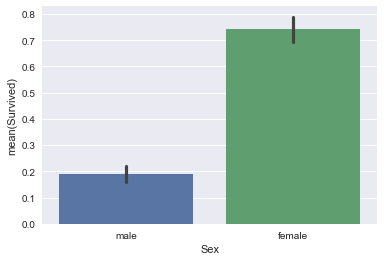

In [7]:
g = sns.barplot(titanic["Sex"], titanic["Survived"])

In [8]:
pd.crosstab(titanic["Pclass"], titanic["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


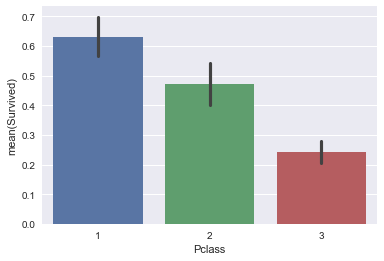

In [9]:
sns.barplot(titanic["Pclass"], titanic["Survived"])

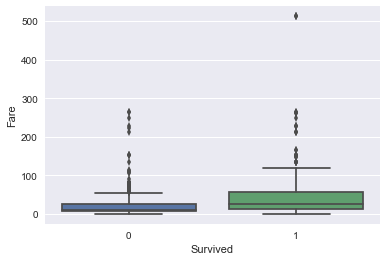

In [12]:
sns.boxplot("Survived", "Fare", data=titanic)

In [4]:
titanic_age = titanic[titanic["Age"].notnull()]
titanic_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


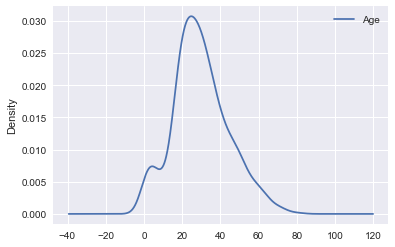

In [5]:
titanic_age[["Age"]].plot(kind="density")

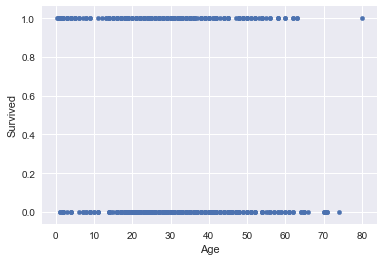

In [7]:
titanic_age.plot(kind='scatter', x='Age', y='Survived')

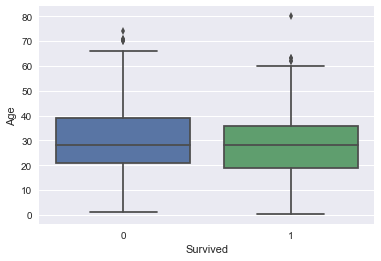

In [8]:
sns.boxplot("Survived", "Age", data=titanic_age)

In [11]:
#Those who are older (above 60) are less likely to survive

In [36]:
titanic_age.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592,-0.003115,-0.028276
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,0.084753,-0.337587
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,-0.159788,0.906142
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.006954,-0.312271
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,-0.051647,0.078461
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,-0.017739,0.029115
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,-0.141399,-0.403639
Pclass_2,-0.003115,0.084753,-0.159788,0.006954,-0.051647,-0.017739,-0.141399,1.000000,-0.562330
Pclass_3,-0.028276,-0.337587,0.906142,-0.312271,0.078461,0.029115,-0.403639,-0.562330,1.000000


# Data Cleaning

- Prepare your dataset for modeling

In [24]:
#removing all the rows of data where there is no age value. This is useful if i want to see the relations between age of passengers and whether the passenger survived
titanic_age = titanic[titanic["Age"].notnull()]


In [25]:
#create dummy variables for Pclass
titanic_age = titanic_age.join(pd.get_dummies(titanic_age['Pclass'], drop_first=True, prefix="Pclass"))
titanic_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [27]:
titanic_gender = pd.get_dummies(titanic_age['Sex'], drop_first=True, prefix='Sex')
titanic_age2 = titanic_age.join(titanic_gender)
titanic_age2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1


# Modeling

- Run a classification model (or a few, if you like)
- How do you know how well your model is doing?

- Ans: Since the outcome is either 0 or 1 (binary discrete variables), it makes sense to do a logistic regression. From such a regression, i can also get the odds of someone surviving or not, depending on characteristics such as age, cabin class, fare and gender.  It does not make sense for me to do a linear regression

In [29]:
#Carrying out Logistic Regression without Regularisation
model1 = LogisticRegression()
factors = ['Sex_male', "Fare", "Age", "Pclass_2", "Pclass_3"]
model1.fit(titanic_age2[factors], titanic_age2['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
#finding out the coefficients of the Logistic regression outcomes
print(model1.coef_)
print(model1.intercept_)

[[-2.28864744  0.00311877 -0.02688064 -0.78069137 -1.9246674 ]]
[ 2.77108931]


In [33]:
#find out how good my model is
predicted = model1.predict(titanic_age2[factors])
print(accuracy_score(titanic_age2['Survived'], predicted))

0.791316526611


In [34]:
#Carrying out Logistic Regression with Regularisation
model2 = LogisticRegression(C=1e3)
factors = ['Sex_male', "Fare", "Age", "Pclass_2", "Pclass_3"]
model2.fit(titanic_age2[factors], titanic_age2['Survived'])

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [35]:
#find out how good my model with Regularisation is
predicted2 = model2.predict(titanic_age2[factors])
print(accuracy_score(titanic_age2['Survived'], predicted2))

0.792717086835


# What does your analysis show?

- What are your findings (in relation to your problem statement)?

- Ans: There is a relation between Survivability and the passengers's attributes such as Age, Pclass, Fare and Gender.  My model is able to predict the outcome correctly 79% of the time. 

In [39]:
print(confusion_matrix(titanic_age2['Survived'], predicted))

[[364  60]
 [ 89 201]]


# Bonus

## Impute missing values

- Which columns have missing values that you could impute rather than dropping the whole row?

In [37]:
#Ans: The column #cabin and #Embarked have missing values and they need not be dropped completely

## Visualize a decision tree classifier

[Example of a visualization](http://scikit-learn.org/stable/_images/iris.svg)  
[sklearn reference](http://scikit-learn.org/stable/modules/tree.html)